In [1]:
#импорт библиотек
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os  

In [2]:
#variables
data='brl'

#импорт данных, сделать циклом
data = pd.read_csv(data+'/all_data.csv', sep=',')


In [3]:
#конвертация данных
data['Date'] = pd.to_datetime(data['Date'], dayfirst=False)


In [4]:
data

,Date,USDBRL Curncy,BCN1W BGN Curncy,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,2007-02-01,2.1004,25.00,1.3022,1.9668,120.82,10.9713,5.2437,5.2140,56.72,...,84.640,96.129,42.240,6.2000,460.25,398.00,118.75,2.6056,2.4119,65.6
1,2007-02-02,2.1043,25.00,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,...,84.960,93.119,39.825,5.9750,461.25,402.00,118.35,2.5953,2.4049,58.5
2,2007-02-05,2.0933,25.00,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,...,85.080,93.125,39.500,5.7500,458.50,402.00,116.60,2.5875,2.3990,61.3
3,2007-02-06,2.0859,25.00,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,...,84.770,91.151,39.510,5.8500,451.00,396.50,116.50,2.5513,2.3695,60.4
4,2007-02-07,2.0925,25.00,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,...,84.710,90.119,39.396,5.8500,452.00,392.25,116.85,2.5488,2.3596,60.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,2021-12-27,5.6316,59.00,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,...,96.093,208.000,91.500,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3888,2021-12-28,5.6275,39.26,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,...,96.202,206.000,92.500,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3889,2021-12-29,5.6932,68.23,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,...,95.929,207.000,91.500,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0
3890,2021-12-30,5.5697,78.02,1.1325,1.3499,115.08,20.4626,0.7307,1.3177,79.32,...,95.968,205.000,90.500,5.4900,779.75,596.00,228.85,2.4431,2.6129,20.0


In [5]:
drop_data = data.copy()

In [6]:
#удаление пустых строчек
drop_data = drop_data.dropna(how='all')

In [7]:
#удаление пропусков спота из-за выходных и праздников
drop_data = drop_data.dropna(subset=['USDBRL Curncy'])


In [8]:
#добавление предыдущих значений признаков в пустые места
for col in drop_data.select_dtypes(include=['int', 'float']):
    while drop_data[col].isnull().any(): 
        drop_data[col] = drop_data[col].fillna(method='ffill')


In [9]:
#вычисление изменения цены

drop_data['devprice'] = (drop_data['USDBRL Curncy'].shift(-1) - (drop_data['USDBRL Curncy'] + (drop_data['BCN1W BGN Curncy'] / 50000))) / drop_data['USDBRL Curncy'].shift(-1)

#перенос последнего столбца на 4-тое место
new_columns = drop_data.columns[:-1].to_list()
new_columns.insert(1, 'devprice')
t_data_0 = drop_data[new_columns]
#удаление 'USDBRL Curncy' и 'BCN1W BGN Curncy' 
t_data = t_data_0.copy()
t_data.drop(['USDBRL Curncy', 'BCN1W BGN Curncy'], axis=1, inplace=True)
t_data.drop(t_data.tail(1).index, inplace=True)

In [10]:
t_data

,Date,devprice,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,2007-02-01,0.001616,1.3022,1.9668,120.82,10.9713,5.2437,5.2140,56.72,55040.0,...,84.640,96.129,42.240,6.2000,460.25,398.00,118.75,2.6056,2.4119,65.6
1,2007-02-02,-0.005494,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,54240.0,...,84.960,93.119,39.825,5.9750,461.25,402.00,118.35,2.5953,2.4049,58.5
2,2007-02-05,-0.003787,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,52360.0,...,85.080,93.125,39.500,5.7500,458.50,402.00,116.60,2.5875,2.3990,61.3
3,2007-02-06,0.002915,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,52570.0,...,84.770,91.151,39.510,5.8500,451.00,396.50,116.50,2.5513,2.3695,60.4
4,2007-02-07,-0.000048,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,53540.0,...,84.710,90.119,39.396,5.8500,452.00,392.25,116.85,2.5488,2.3596,60.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,2021-12-23,-0.008289,1.1327,1.3408,114.39,20.6433,0.7190,1.3076,76.85,69820.0,...,96.019,212.000,93.500,5.3325,814.75,605.75,231.20,2.3405,2.4952,23.9
3887,2021-12-27,-0.000938,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,69630.0,...,96.093,208.000,91.500,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3888,2021-12-28,0.011402,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,70220.0,...,96.202,206.000,92.500,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3889,2021-12-29,-0.022419,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,70050.0,...,95.929,207.000,91.500,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0


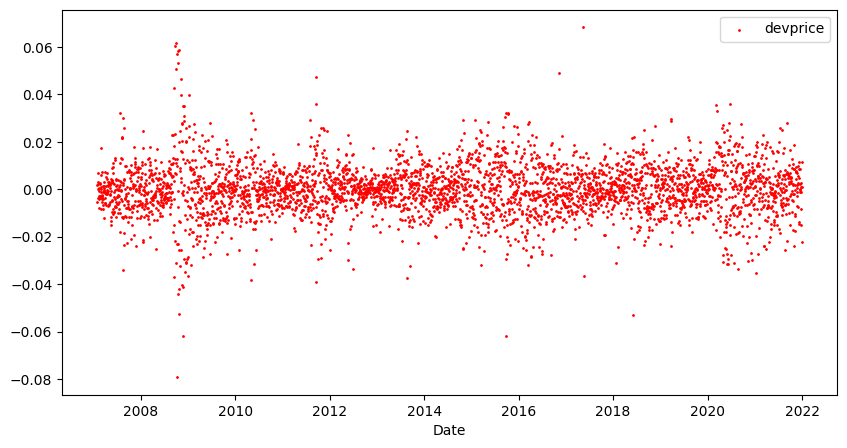

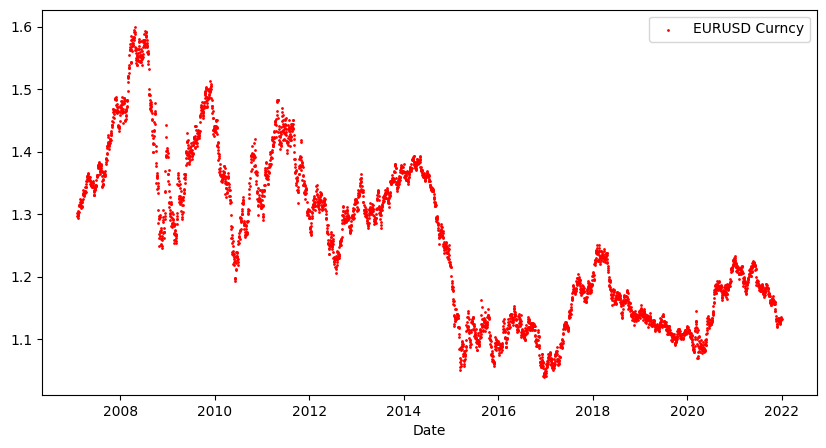

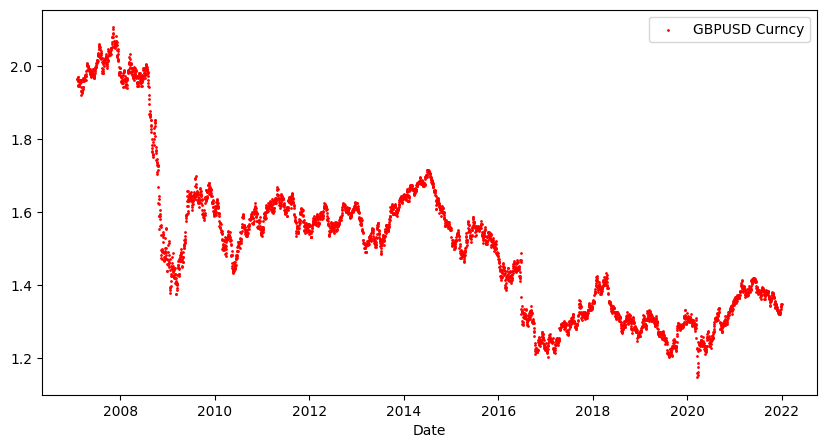

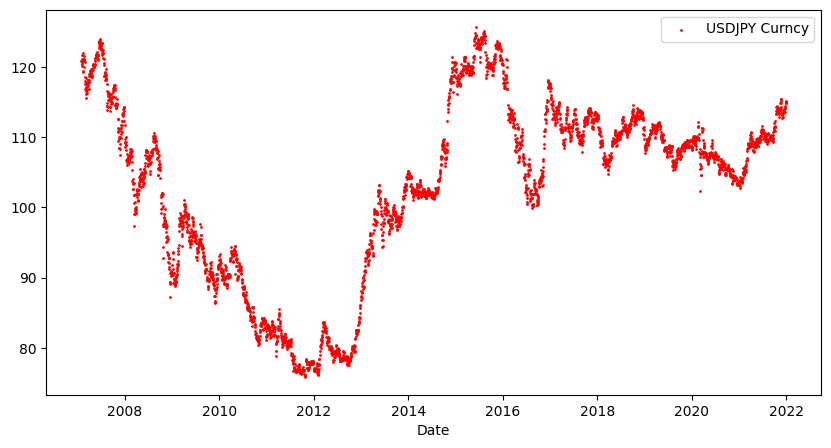

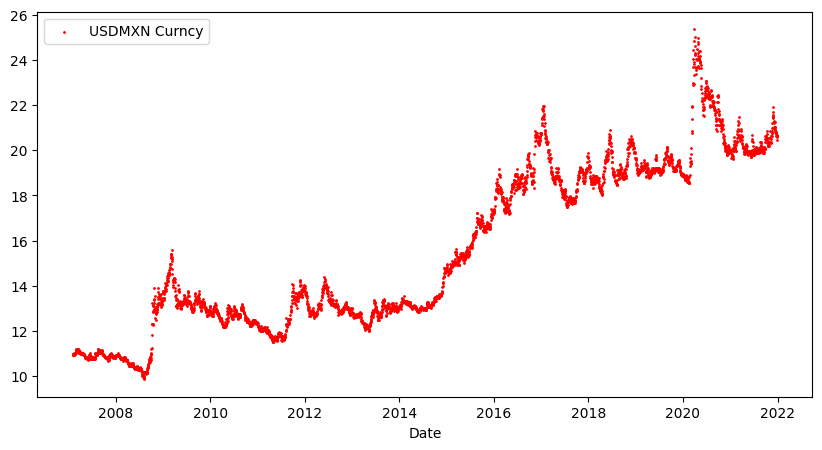

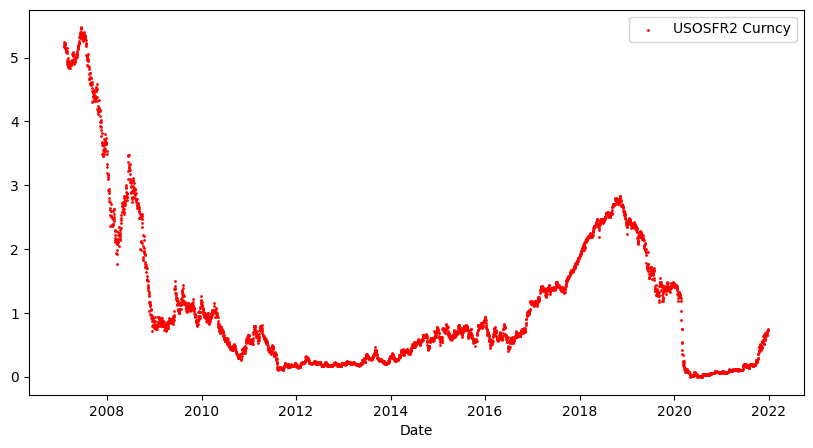

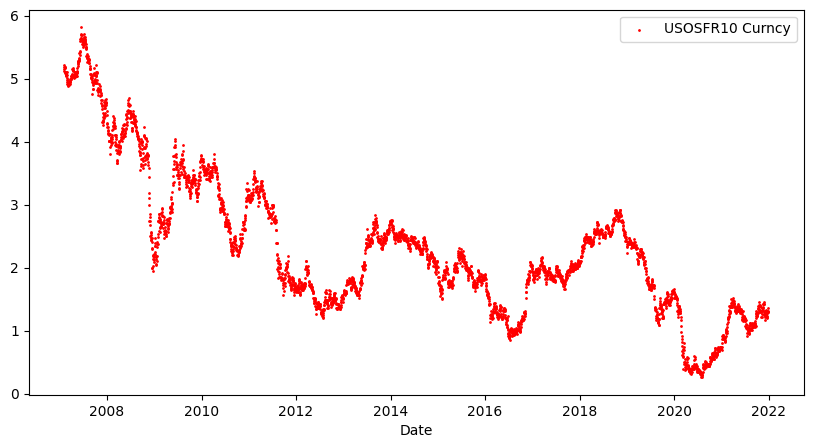

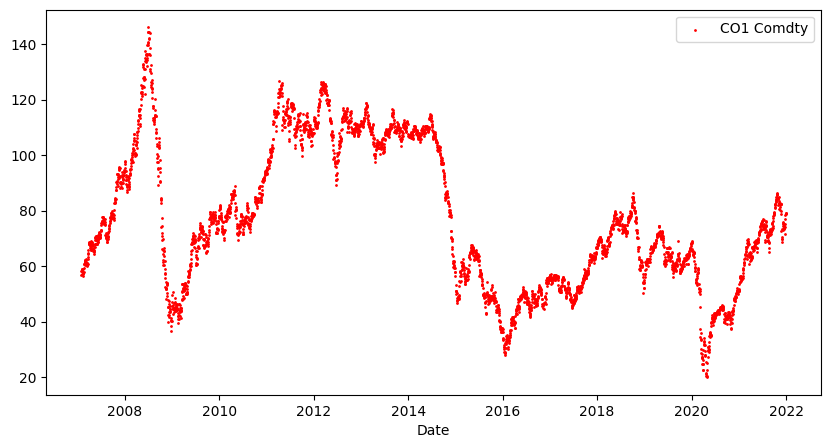

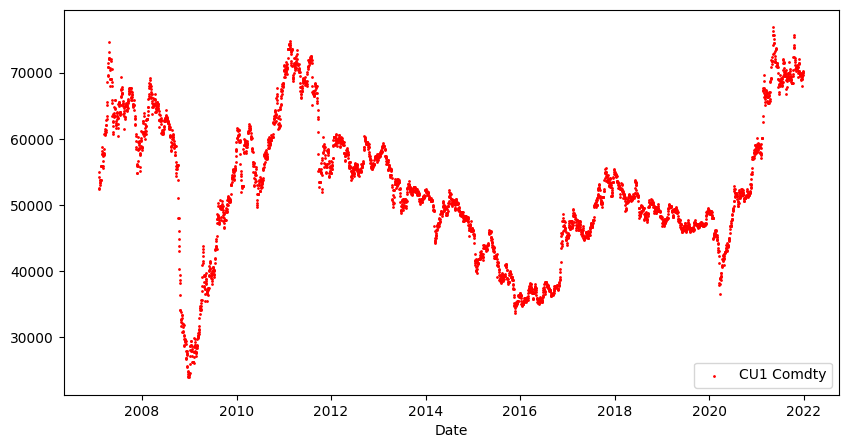

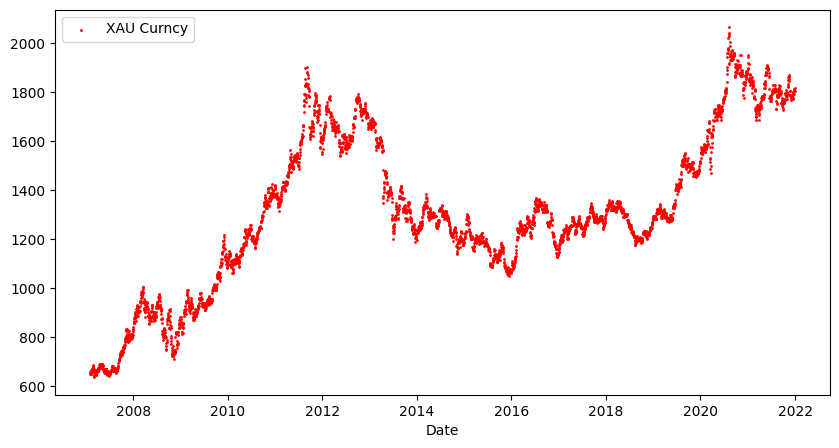

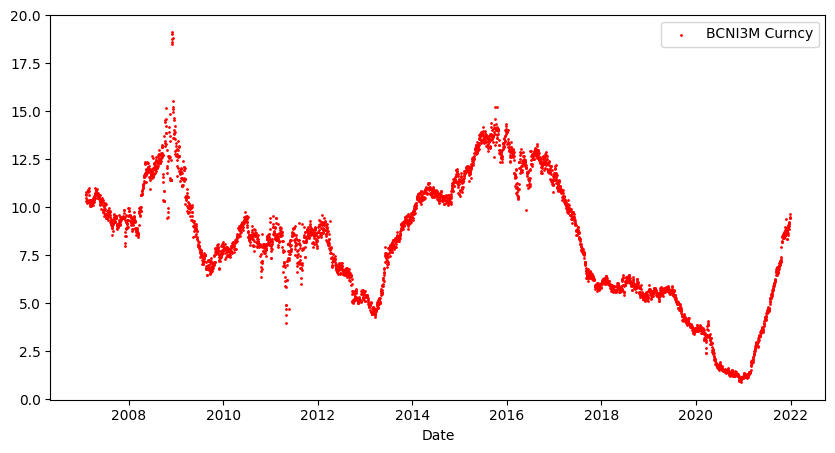

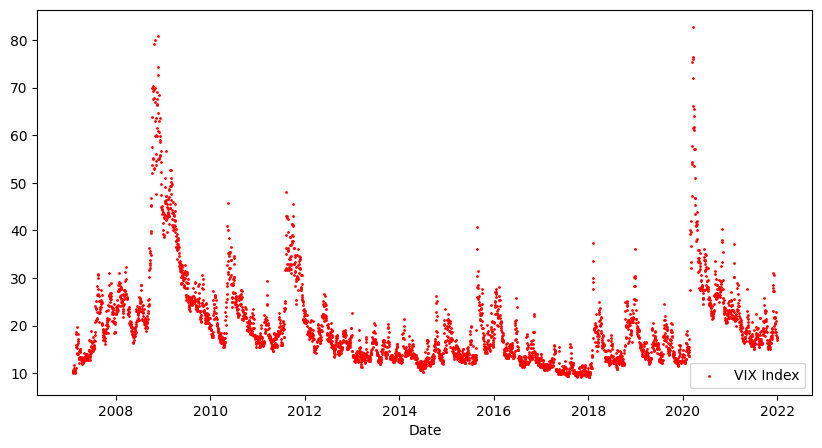

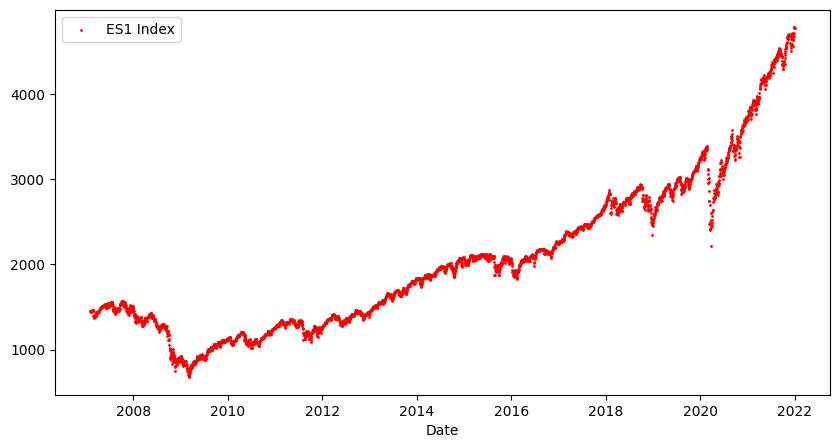

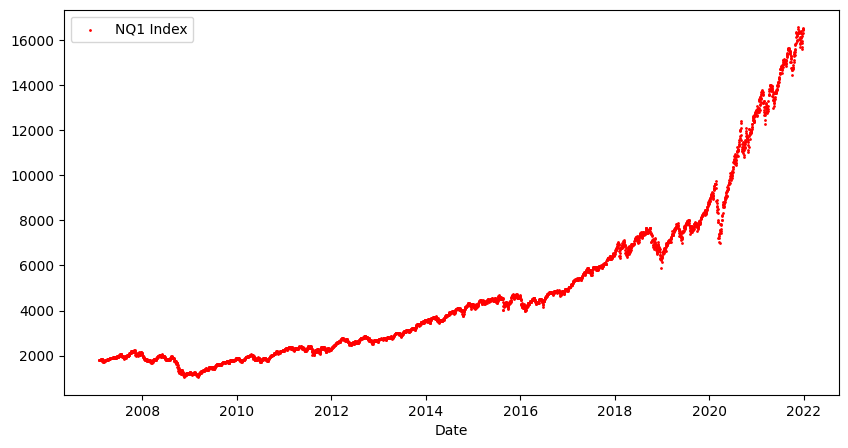

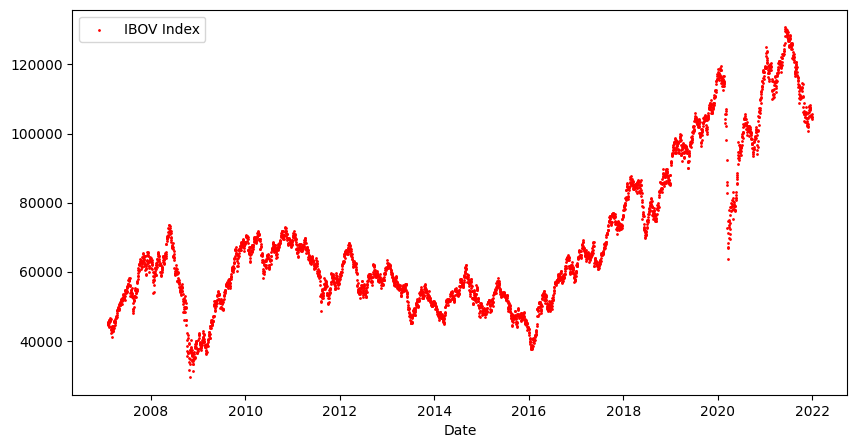

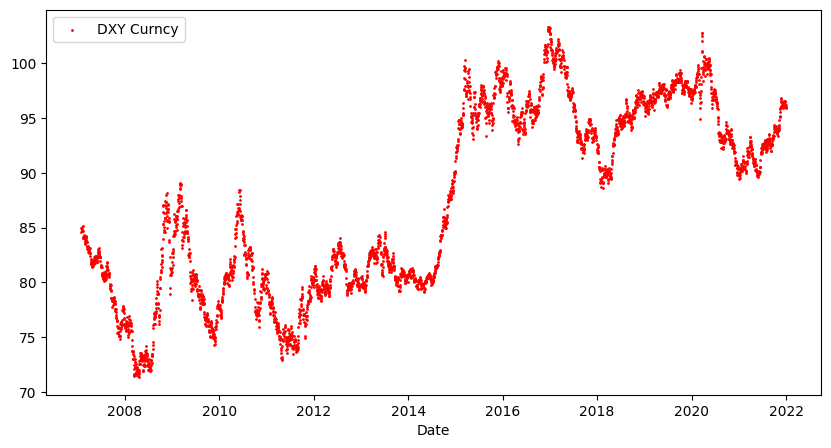

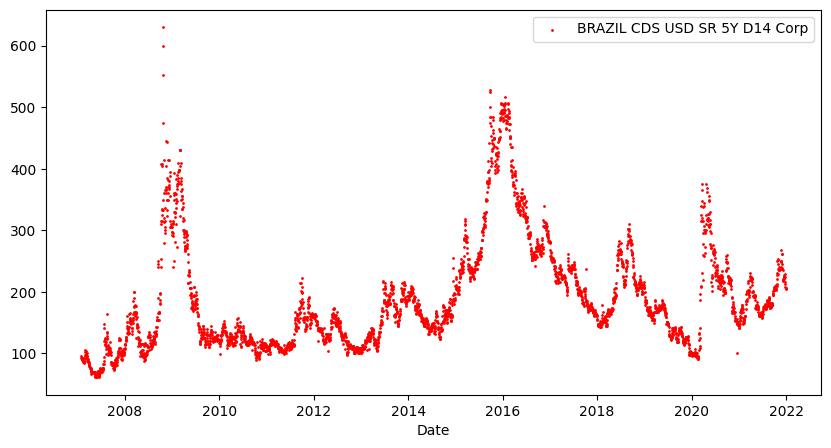

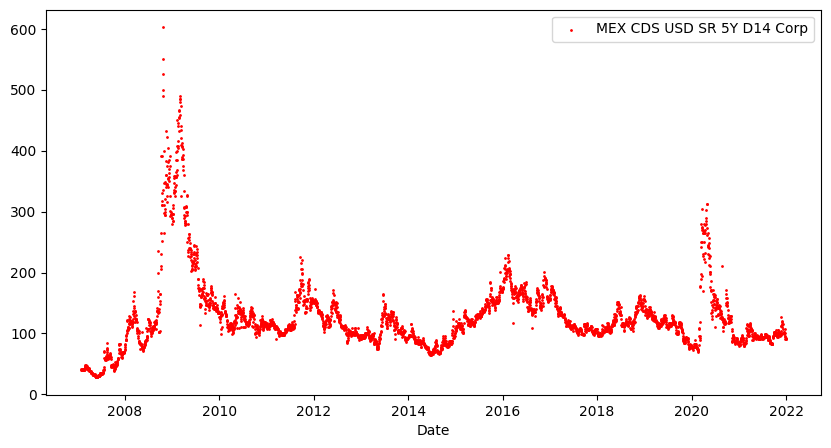

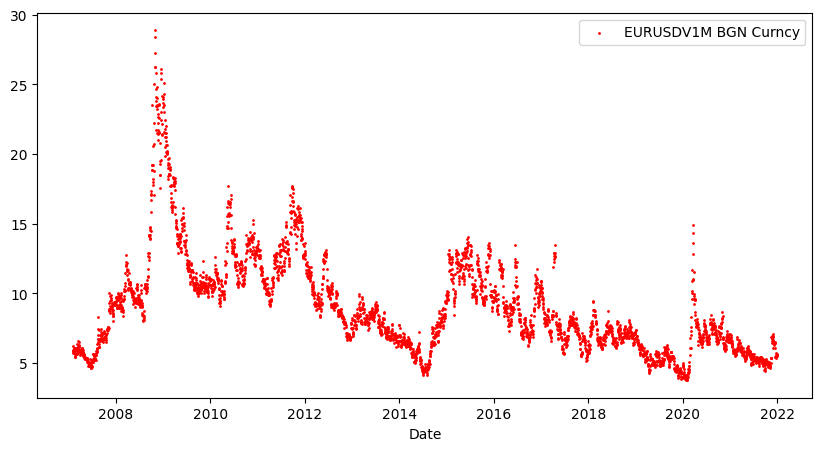

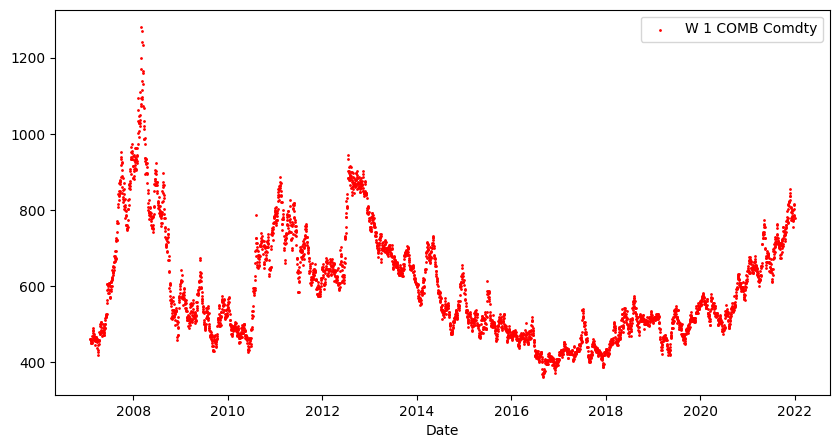

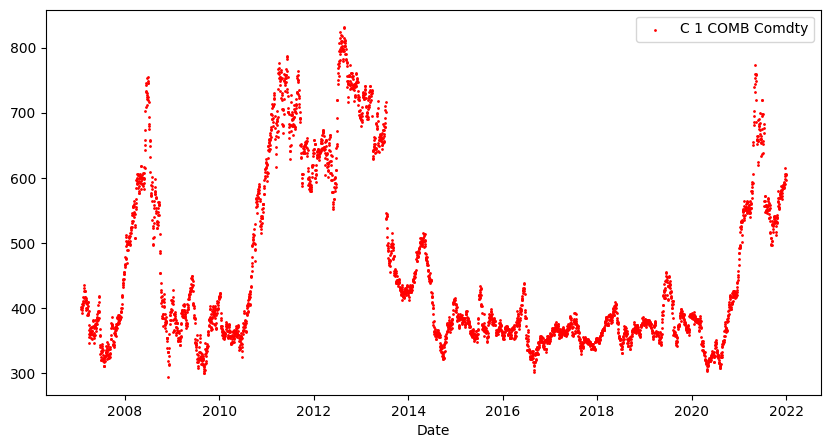

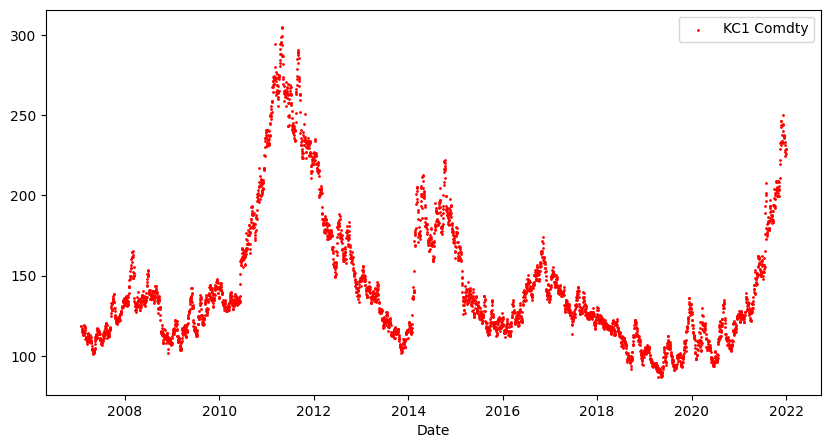

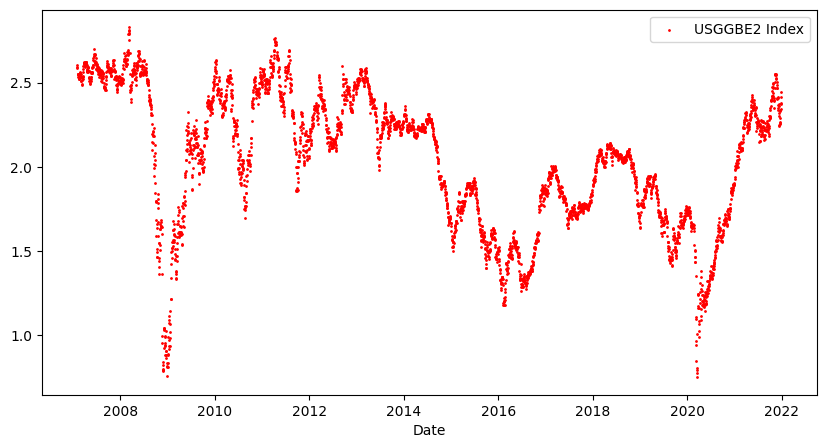

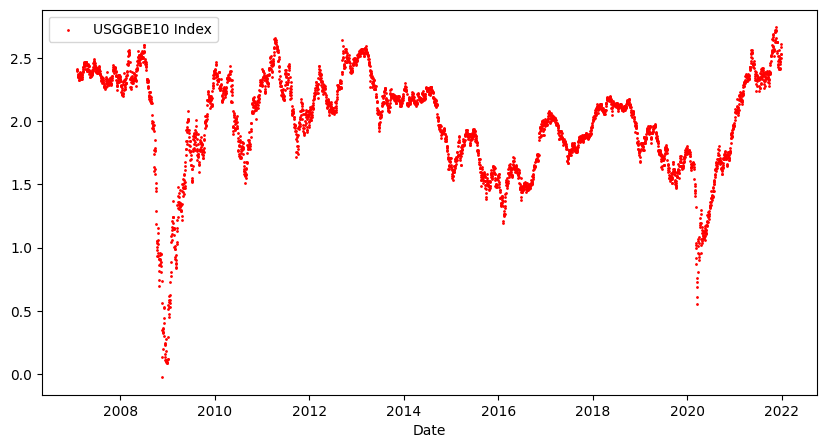

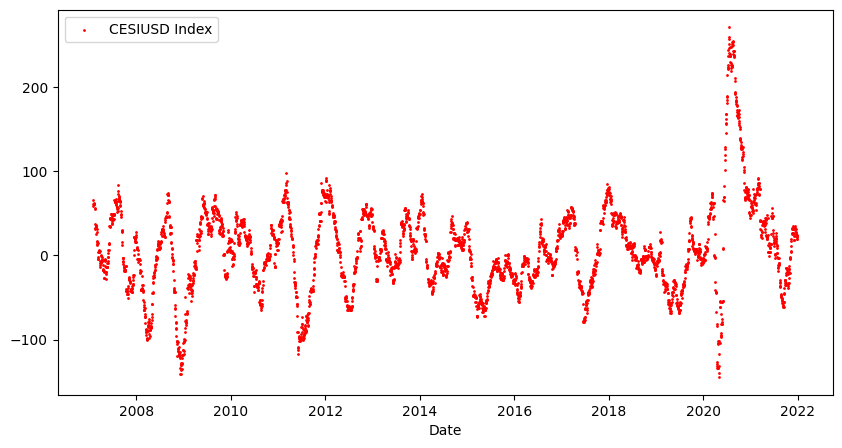

In [11]:
# построение графиков разпределения признаков для различных классов

# Перебор столбцов и построение графиков
for column in t_data.columns:
    if column not in ['Date']:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
        axes.scatter(
        x=t_data['Date'],
        y=t_data[column],
        s=1,
        marker='o',
        c = 'red',
        label=column
        );

    
                # Настройка осей и заголовка
        plt.xlabel('Date')
        #axes[0].set_ylabel(column)
        #axes[1].set_ylabel(column)
            
        # Добавление легенды
        axes.legend()
                
                    # Отображение графика
        plt.show()

In [12]:
#вычисление таргета
#t_data['target']=(t_data['devprice']-t_data['devprice'].mean())/t_data['devprice'].std()
t_data['target']=drop_data['USDBRL Curncy']
(t_data['devprice']-t_data['devprice'].min())*(10/(t_data['devprice'].max()-t_data['devprice'].min()))-5
#t_data['target'] = np.where(t_data['target'] == -0.0, 0.0, t_data['target'])
new_columns = t_data.columns[:-1].to_list()
new_columns.insert(2, 'target')
t_data = t_data[new_columns]

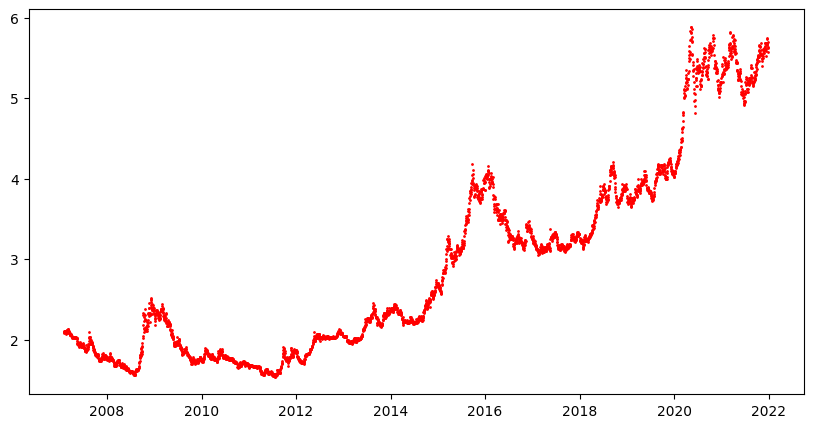

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.scatter(
    x=t_data['Date'],
    y=t_data['target'],
    s=1,
    marker='o',
    c = 'red',
    label=column
);

In [14]:
t_data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,3755,2014-07-07 00:49:28.202396928,2007-02-01 00:00:00,2010-10-06 12:00:00,2014-07-07 00:00:00,2018-04-03 12:00:00,2021-12-30 00:00:00,NaN
devprice,3755.0,-0.00007,-0.07924,-0.005884,-0.000054,0.005883,0.068323,0.010827
target,3755.0,2.922241,1.5391,1.8763,2.379,3.7572,5.887,1.207184
EURUSD Curncy,3755.0,1.258541,1.0388,1.13435,1.2525,1.3582,1.5991,0.130565
GBPUSD Curncy,3755.0,1.519371,1.1485,1.3276,1.5245,1.61545,2.1075,0.213321
USDJPY Curncy,3755.0,102.798123,75.82,93.77,106.28,111.38,125.63,12.708885
USDMXN Curncy,3755.0,15.582906,9.8581,12.7652,13.8272,19.0268,25.3588,3.618855
USOSFR2 Curncy,3755.0,1.154606,-0.0092,0.2742,0.7157,1.46465,5.4752,1.204237
USOSFR10 Curncy,3755.0,2.329548,0.2612,1.55965,2.1072,2.81925,5.8163,1.130269
CO1 Comdty,3755.0,76.687822,19.99,56.125,71.9,102.905,146.08,25.579646


In [15]:
#выеление тестового набора для сохранения ненормализованных значений
n = len(t_data)
test_df_0 = t_data[int(n*0.8):]

In [16]:
# Преобразование datetime в дни
data_start=t_data['Date'].min()
t_data['Date'] = (t_data['Date'] - data_start).dt.days

In [17]:
#нормализация данных 
t_data=t_data.drop('devprice', axis=1)
for column in t_data.columns:
    if column not in ['target']:
        t_data[column]=(t_data[column]-t_data[column].min())*(1/(t_data[column].max()-t_data[column].min()))

In [18]:
t_data.describe()

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,...,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,0.498170,2.922241,0.392185,0.386727,0.541621,0.369326,0.212203,0.372333,0.449662,0.538280,...,0.499231,0.223819,0.174054,0.210479,0.253566,0.305092,0.264184,0.619139,0.723662,0.362065
std,0.289208,1.207184,0.233027,0.222441,0.255147,0.233464,0.219575,0.203465,0.202868,0.194951,...,0.264791,0.152897,0.106498,0.141856,0.153385,0.245017,0.190768,0.193946,0.147202,0.125758
min,0.000000,1.539100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246695,1.876300,0.170534,0.186757,0.360369,0.187546,0.051674,0.233740,0.286581,0.429315,...,0.273451,0.111958,0.120719,0.110005,0.138194,0.127383,0.136082,0.474179,0.638142,0.288637
50%,0.498164,2.379000,0.381403,0.392075,0.611524,0.256059,0.132175,0.332307,0.411690,0.519682,...,0.456132,0.184057,0.152060,0.177601,0.205658,0.178522,0.208247,0.644576,0.753254,0.356042
75%,0.749082,3.757200,0.570052,0.486913,0.713913,0.591502,0.268735,0.460487,0.657586,0.668055,...,0.756482,0.287808,0.199114,0.281931,0.348205,0.482334,0.339290,0.776903,0.833333,0.434280
max,1.000000,5.887000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#разбиение данных
column_indices = {name: i for i, name in enumerate(t_data.columns)}


train_df = t_data[0:int(n*0.6)]
val_df = t_data[int(n*0.6):int(n*0.8)]
test_df = t_data[int(n*0.8):]


In [20]:
#создание класса окна
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [21]:
#сплит с учетом 
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [22]:
def plot(self, model=None, plot_col='target', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('days')

WindowGenerator.plot = plot

In [23]:
# создание tf.data.Dataset
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=20,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [24]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [25]:
wide=[1,2,3]
wide[-1]

3

In [26]:
def prediction(self, model=None):
  test_dataset = self.test
  all_predictions = []
  all_labels = []
  all_dates = []

  for inputs, labels in test_dataset:
      # Получение предсказаний от модели
      predictions = model.predict(inputs, verbose=0)
      if self.input_width>1:
        date = inputs[:, :, 0][:,-1]
        all_dates.extend(date)
      else:
        date = inputs[:, :, 0]
        all_dates.extend(date)
      if self.label_width>1:
        all_predictions.extend(predictions[:,-2])
      else:
        all_predictions.extend(predictions)
      #all_labels.extend(labels)

  all_predictions = np.squeeze(np.array(all_predictions))
  all_labels = np.squeeze(np.array(all_labels))
  all_dates = np.squeeze(np.array(all_dates))
  results_df = pd.DataFrame({'Date': all_dates, 'Predictions': all_predictions})#, 'Labels': all_labels})
  sorted_df = results_df.sort_values(by='Date', ascending=True)
  
  shape=sorted_df.shape[0]

  df = test_df_0.iloc[(test_df_0.shape[0]-shape)+1:, 0:3]
  df['target_p']=np.array(sorted_df['Predictions'])[:-1]
  df = df[['Date', 'devprice', 'target', 'target_p']]
  #df['pnl']=(df['target_p']/5)*df['devprice']
  #df['sum']=df["pnl"].cumsum()
  #sharp=round((df['sum'].mean()*255**0.5)/df['sum'].std(),1)
  #fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
  #axes.bar(
  #  x=df['Date'],
  #  height=df['pnl']
  #);
  #fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
  #axes.bar(
  #  x=df['Date'],
  #  height=df['sum']
  #);
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
  axes.scatter(
    x=df['Date'],
    y=df['target']
  );
  axes.plot(
    df['Date'],
    df['target_p'],
    color='red'
  );
  return df, shape


WindowGenerator.prediction = prediction

# Одноступенчатые модели

In [27]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['target'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['target']

In [28]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (20, 1, 26)
Labels shape (batch, time, features): (20, 1, 1)


In [29]:
#базовый прогноз, озвращает текущую цену в качестве прогноза, прогнозируя «без изменений»
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]


In [30]:
baseline = Baseline(label_index=column_indices['target'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

38/38 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_absolute_error: 0.0262


In [31]:
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,
    label_columns=['target'])

wide_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['target']

In [32]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 30, 26)
Output shape: (20, 30, 1)


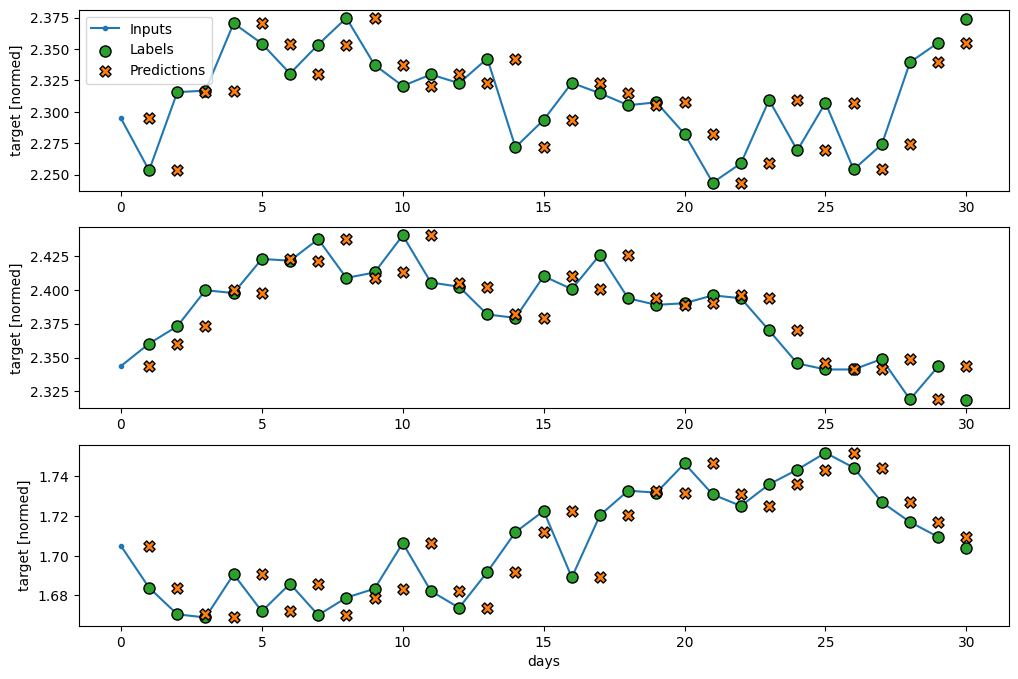

In [33]:
wide_window.plot(baseline)
#это просто метки, сдвинутые вправо на один день
    #Синяя линия Inputs показывает входную температуру на каждом временном шаге. Модель получает все функции, этот график показывает только температуру.
    #Зеленые точки Labels показывают целевое значение прогноза. Эти точки отображаются во время прогнозирования, а не во время ввода. Поэтому диапазон меток смещен на 1 шаг относительно входов.
    #Оранжевые кресты Predictions — это прогнозы модели для каждого выходного временного шага. Если бы модель предсказывала идеально, прогнозы попадали бы прямо в Labels .

(           Date  devprice  target  target_p
 3112 2019-01-07 -0.005172  3.7327    3.7594
 3113 2019-01-08 -0.009103  3.7139    3.7155
 3114 2019-01-09  0.008258  3.6808    3.7327
 3115 2019-01-10  0.000389  3.7118    3.7139
 3116 2019-01-11 -0.004423  3.7136    3.6808
 ...         ...       ...     ...       ...
 3885 2021-12-23 -0.008289  5.6772    5.7449
 3887 2021-12-27 -0.000938  5.6316    5.6603
 3888 2021-12-28  0.011402  5.6275    5.6772
 3889 2021-12-29 -0.022419  5.6932    5.6316
 3890 2021-12-30  0.000814  5.5697    5.6275
 
 [749 rows x 4 columns],
 750)

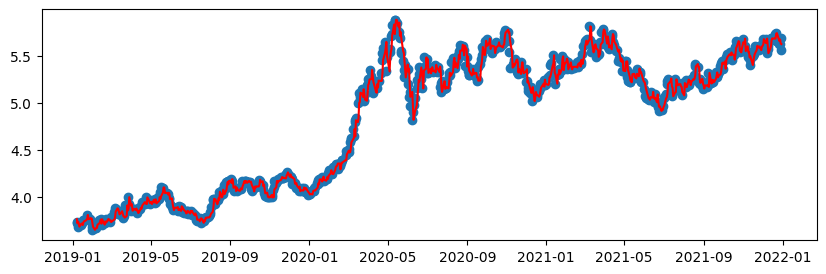

In [45]:
single_step_window.prediction(baseline)

In [46]:
# линейная модель
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])


In [47]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)


Input shape: (20, 1, 26)
Output shape: (20, 1, 1)


In [48]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=30):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [49]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)


Epoch 1/100
113/113 [==============================] - 1s 5ms/step - loss: 4.3189 - mean_absolute_error: 1.9251 - val_loss: 9.0307 - val_mean_absolute_error: 2.9885
Epoch 2/100
113/113 [==============================] - 0s 3ms/step - loss: 1.3654 - mean_absolute_error: 0.9371 - val_loss: 4.5297 - val_mean_absolute_error: 2.1068
Epoch 3/100
113/113 [==============================] - 0s 4ms/step - loss: 0.5681 - mean_absolute_error: 0.5205 - val_loss: 2.7494 - val_mean_absolute_error: 1.6322
Epoch 4/100
113/113 [==============================] - 0s 4ms/step - loss: 0.3977 - mean_absolute_error: 0.4467 - val_loss: 2.0494 - val_mean_absolute_error: 1.4037
Epoch 5/100
113/113 [==============================] - 0s 4ms/step - loss: 0.3304 - mean_absolute_error: 0.4197 - val_loss: 1.6821 - val_mean_absolute_error: 1.2687
Epoch 6/100
113/113 [==============================] - 0s 4ms/step - loss: 0.2754 - mean_absolute_error: 0.3852 - val_loss: 1.4083 - val_mean_absolute_error: 1.1584
Epoch 7/10

In [50]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 30, 26)
Output shape: (20, 30, 1)


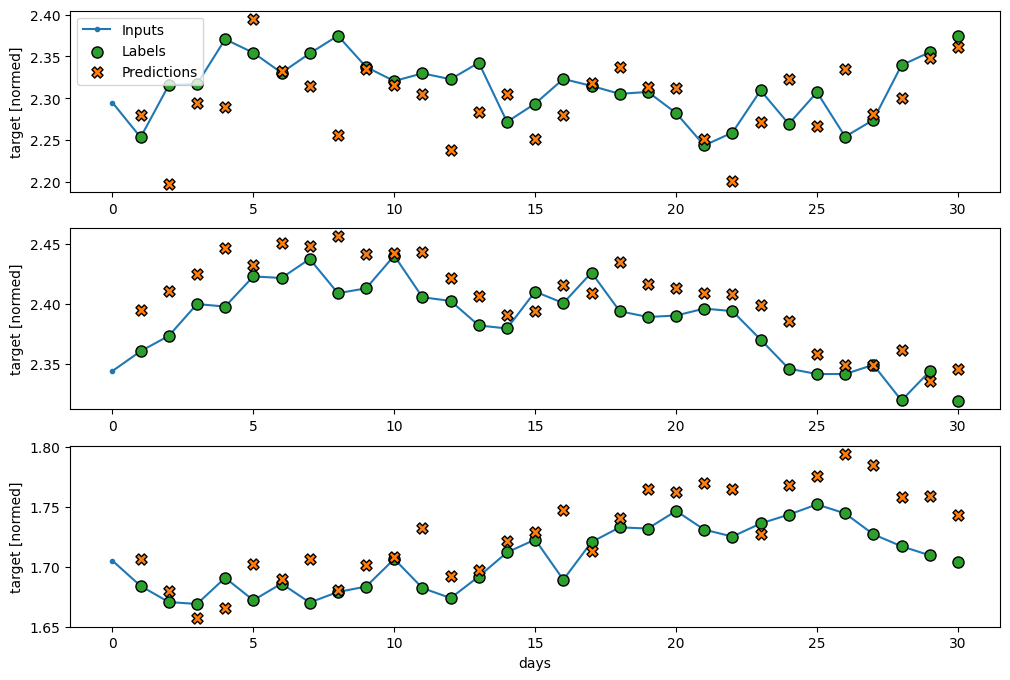

In [51]:
wide_window.plot(linear)


(           Date  devprice  target  target_p
 3112 2019-01-07 -0.005172  3.7327  3.553465
 3113 2019-01-08 -0.009103  3.7139  3.527096
 3114 2019-01-09  0.008258  3.6808  3.530937
 3115 2019-01-10  0.000389  3.7118  3.518121
 3116 2019-01-11 -0.004423  3.7136  3.482012
 ...         ...       ...     ...       ...
 3885 2021-12-23 -0.008289  5.6772  5.317998
 3887 2021-12-27 -0.000938  5.6316  5.260772
 3888 2021-12-28  0.011402  5.6275  5.275919
 3889 2021-12-29 -0.022419  5.6932  5.257469
 3890 2021-12-30  0.000814  5.5697  5.251401
 
 [749 rows x 4 columns],
 750)

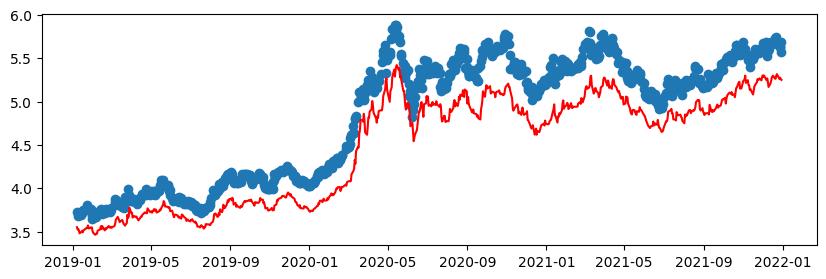

In [52]:
single_step_window.prediction(linear)

In [53]:
# плотный слой

In [54]:
CONV_WIDTH = 30
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['target'])

conv_window


Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30]
Label column name(s): ['target']

Text(0.5, 1.0, 'Given 3 days of inputs, predict 1 day into the future.')

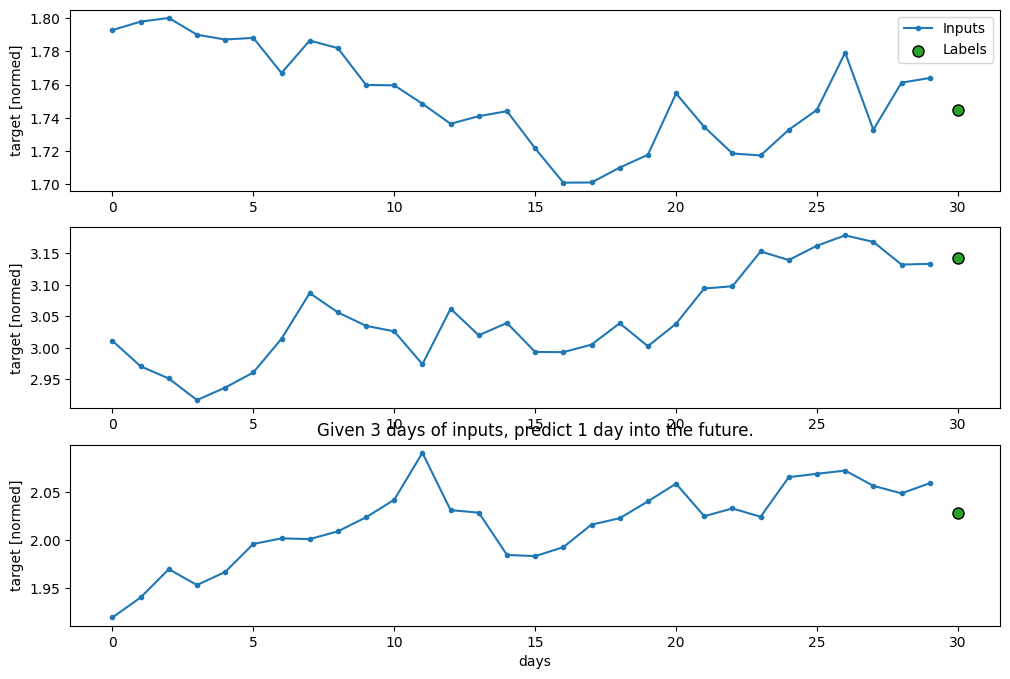

In [55]:
conv_window.plot()
plt.title("Given 3 days of inputs, predict 1 day into the future.")

In [56]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])


In [57]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)


Input shape: (20, 30, 26)
Output shape: (20, 1, 1)


In [58]:
history = compile_and_fit(multi_step_dense, conv_window)

val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)


Epoch 1/100
112/112 [==============================] - 2s 6ms/step - loss: 0.1726 - mean_absolute_error: 0.1988 - val_loss: 0.0317 - val_mean_absolute_error: 0.1329
Epoch 2/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0677 - val_loss: 0.0292 - val_mean_absolute_error: 0.1315
Epoch 3/100
112/112 [==============================] - 1s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0605 - val_loss: 0.0437 - val_mean_absolute_error: 0.1727
Epoch 4/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0613 - val_loss: 0.0277 - val_mean_absolute_error: 0.1348
Epoch 5/100
112/112 [==============================] - 0s 3ms/step - loss: 0.0052 - mean_absolute_error: 0.0536 - val_loss: 0.0435 - val_mean_absolute_error: 0.1800
Epoch 6/100
112/112 [==============================] - 1s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0497 - val_loss: 0.0282 - val_mean_absolute_error: 0.1407
Epoch 7/10

In [59]:
from IPython.display import clear_output

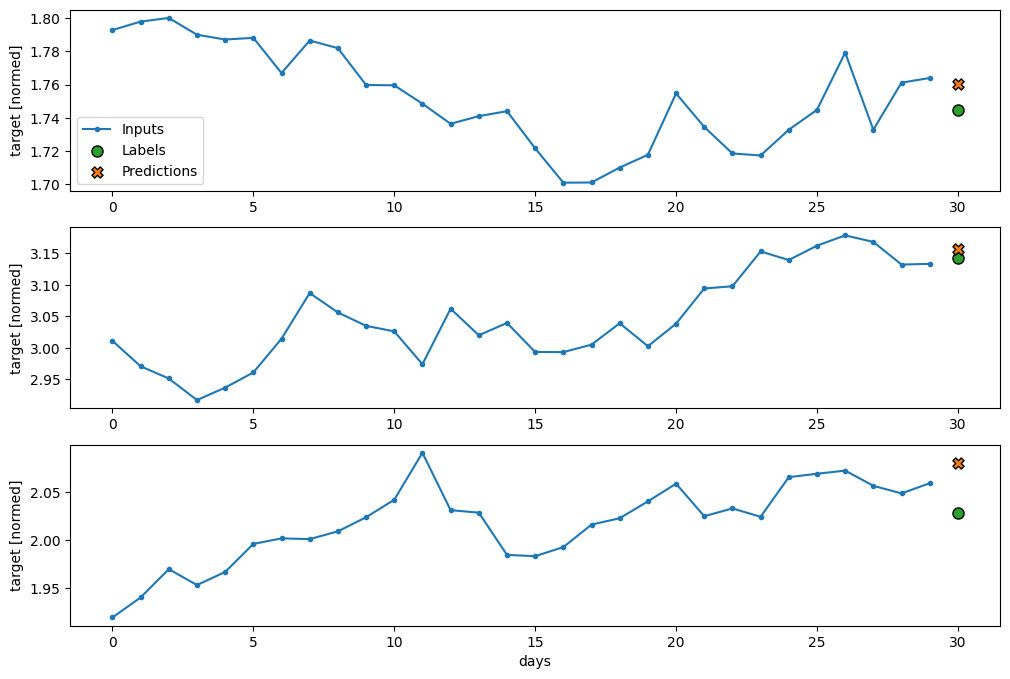

In [60]:
conv_window.plot(multi_step_dense)


(           Date  devprice  target  target_p
 3141 2019-02-15  0.008962  3.7014  3.533260
 3142 2019-02-18 -0.003788  3.7354  3.537692
 3143 2019-02-19  0.002145  3.7218  3.532997
 3144 2019-02-20  0.008475  3.7303  3.541018
 3145 2019-02-21 -0.004287  3.7627  3.534844
 ...         ...       ...     ...       ...
 3885 2021-12-23 -0.008289  5.6772  5.484444
 3887 2021-12-27 -0.000938  5.6316  5.473790
 3888 2021-12-28  0.011402  5.6275  5.476896
 3889 2021-12-29 -0.022419  5.6932  5.454355
 3890 2021-12-30  0.000814  5.5697  5.461325
 
 [720 rows x 4 columns],
 721)

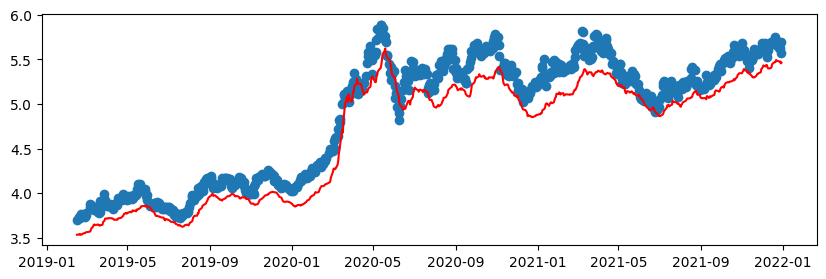

In [66]:
conv_window.prediction(multi_step_dense)

In [67]:
#сверточная нейронная сеть
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=25,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=1),
])


In [68]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)


Conv model on `conv_window`
Input shape: (20, 30, 26)
Output shape: (20, 1, 1)


In [69]:
history = compile_and_fit(conv_model, conv_window)

#IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)


Epoch 1/100
112/112 [==============================] - 2s 6ms/step - loss: 0.0878 - mean_absolute_error: 0.1513 - val_loss: 0.0296 - val_mean_absolute_error: 0.1349
Epoch 2/100
112/112 [==============================] - 1s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0582 - val_loss: 0.0272 - val_mean_absolute_error: 0.1298
Epoch 3/100
112/112 [==============================] - 1s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0567 - val_loss: 0.0194 - val_mean_absolute_error: 0.1081
Epoch 4/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0525 - val_loss: 0.0171 - val_mean_absolute_error: 0.1014
Epoch 5/100
112/112 [==============================] - 1s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0497 - val_loss: 0.0243 - val_mean_absolute_error: 0.1296
Epoch 6/100
112/112 [==============================] - 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0488 - val_loss: 0.0188 - val_mean_absolute_error: 0.1121
Epoch 7/10

In [70]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)


Wide window
Input shape: (20, 30, 26)
Labels shape: (20, 30, 1)
Output shape: (20, 1, 1)


In [71]:
LABEL_WIDTH = 30
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['target'])

wide_conv_window

Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58]
Label indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Label column name(s): ['target']

In [72]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)


Wide conv window
Input shape: (20, 59, 26)
Labels shape: (20, 30, 1)
Output shape: (20, 30, 1)


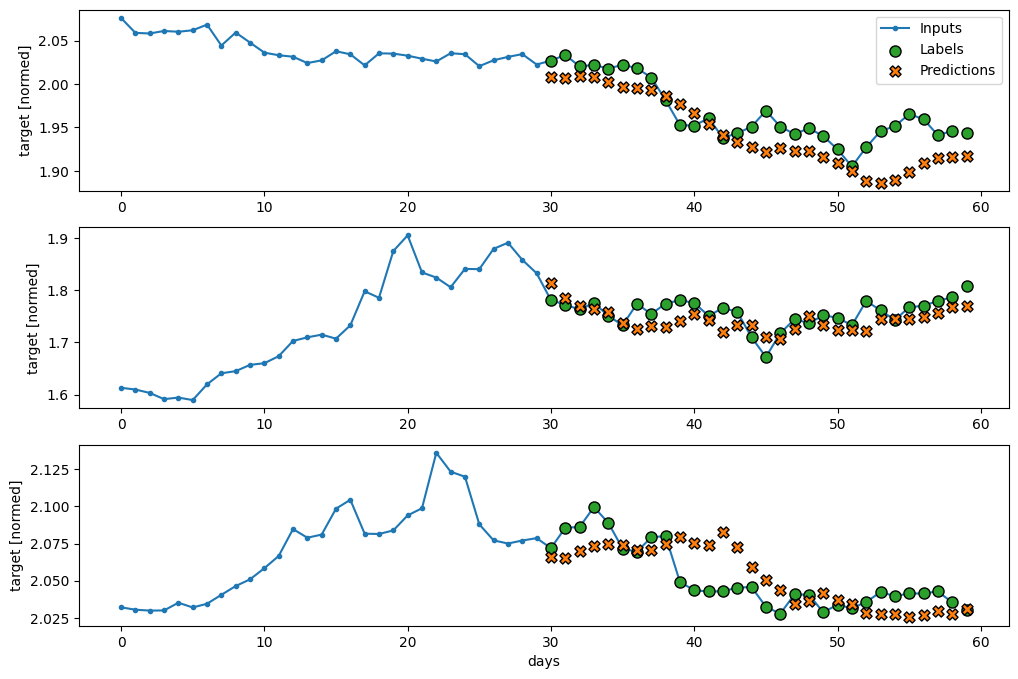

In [73]:
wide_conv_window.plot(conv_model)


(           Date  devprice  target  target_p
 3141 2019-02-15  0.008962  3.7014  3.651146
 3142 2019-02-18 -0.003788  3.7354  3.651183
 3143 2019-02-19  0.002145  3.7218  3.646474
 3144 2019-02-20  0.008475  3.7303  3.654828
 3145 2019-02-21 -0.004287  3.7627  3.652319
 ...         ...       ...     ...       ...
 3885 2021-12-23 -0.008289  5.6772  5.505617
 3887 2021-12-27 -0.000938  5.6316  5.487918
 3888 2021-12-28  0.011402  5.6275  5.486294
 3889 2021-12-29 -0.022419  5.6932  5.476246
 3890 2021-12-30  0.000814  5.5697  5.472434
 
 [720 rows x 4 columns],
 721)

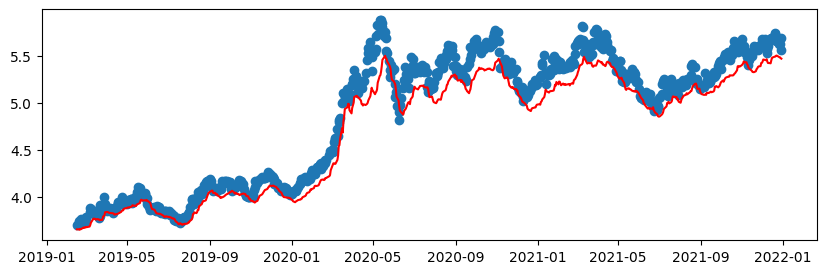

In [74]:
conv_window.prediction(conv_model)

In [75]:
#рекуррентная нейронная сеть lstm
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(25, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])


In [76]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)


Input shape: (20, 30, 26)
Output shape: (20, 30, 1)


In [77]:
history = compile_and_fit(lstm_model, wide_window)

#IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)


Epoch 1/100
112/112 [==============================] - 6s 20ms/step - loss: 0.9706 - mean_absolute_error: 0.6867 - val_loss: 1.5154 - val_mean_absolute_error: 1.1280
Epoch 2/100
112/112 [==============================] - 2s 15ms/step - loss: 0.1714 - mean_absolute_error: 0.2404 - val_loss: 0.4479 - val_mean_absolute_error: 0.4446
Epoch 3/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0735 - mean_absolute_error: 0.1324 - val_loss: 0.3025 - val_mean_absolute_error: 0.3555
Epoch 4/100
112/112 [==============================] - 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0997 - val_loss: 0.2269 - val_mean_absolute_error: 0.3117
Epoch 5/100
112/112 [==============================] - 2s 16ms/step - loss: 0.0298 - mean_absolute_error: 0.0808 - val_loss: 0.1907 - val_mean_absolute_error: 0.2958
Epoch 6/100
112/112 [==============================] - 2s 16ms/step - loss: 0.0206 - mean_absolute_error: 0.0699 - val_loss: 0.1577 - val_mean_absolute_error: 0.2769
Epoc

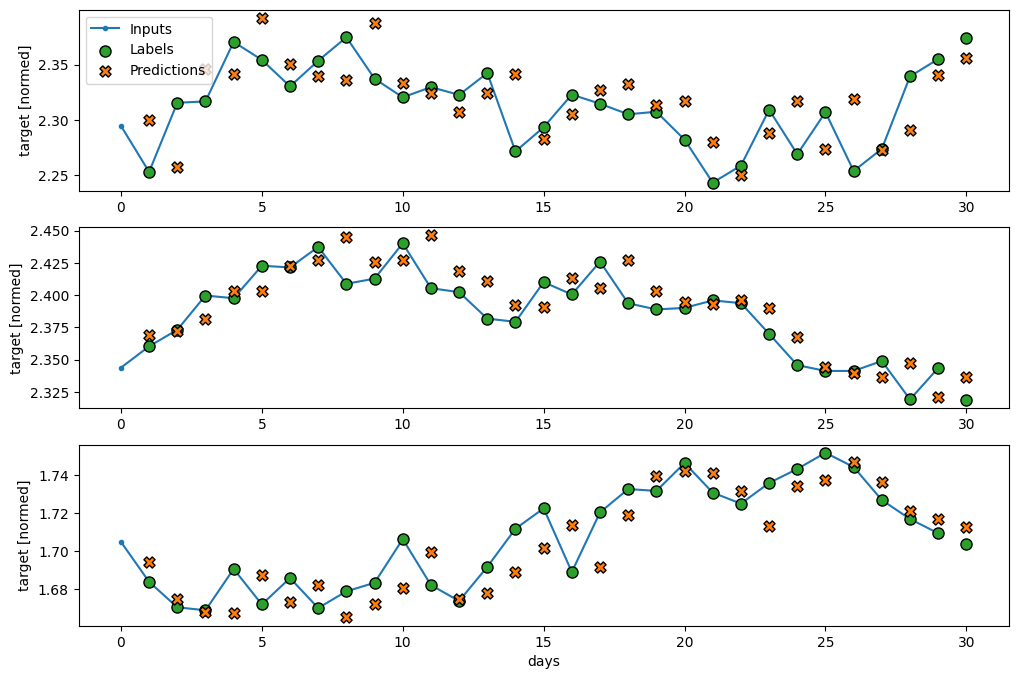

In [78]:
wide_window.plot(lstm_model)


(           Date  devprice  target  target_p
 3141 2019-02-15  0.008962  3.7014  3.627157
 3142 2019-02-18 -0.003788  3.7354  3.663297
 3143 2019-02-19  0.002145  3.7218  3.633668
 3144 2019-02-20  0.008475  3.7303  3.620035
 3145 2019-02-21 -0.004287  3.7627  3.639814
 ...         ...       ...     ...       ...
 3885 2021-12-23 -0.008289  5.6772  4.869874
 3887 2021-12-27 -0.000938  5.6316  4.867409
 3888 2021-12-28  0.011402  5.6275  4.822185
 3889 2021-12-29 -0.022419  5.6932  4.825444
 3890 2021-12-30  0.000814  5.5697  4.801630
 
 [720 rows x 4 columns],
 721)

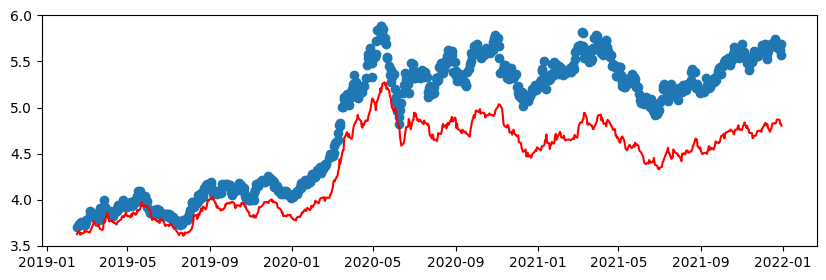

In [79]:
wide_window.prediction(lstm_model)

In [80]:
#Performance

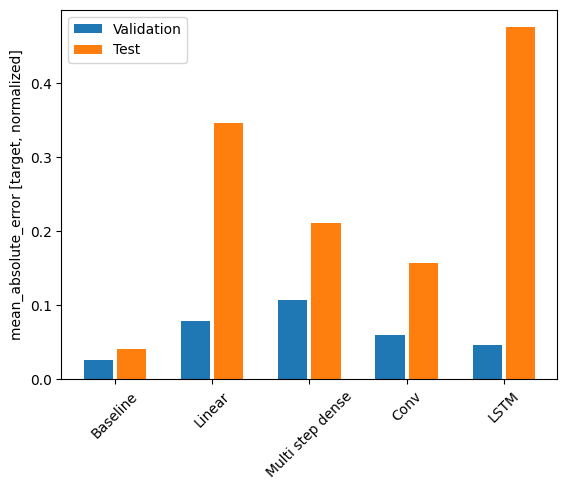

In [81]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [target, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()


In [82]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')


Baseline    : 0.0406
Linear      : 0.3463
Multi step dense: 0.2109
Conv        : 0.1578
LSTM        : 0.4753
